# Customer Sentiment Analysis Project with NLTK
 **Project Overview**

This project performs Sentiment Analysis on textual data using Python and Natural Language Processing (NLP) techniques. The goal is to analyze large sets of text and classify each piece of text as Positive, Negative, or Neutral based on its sentiment.

1. **Tools & Libraries Used**

NLTK (Natural Language Toolkit): For text preprocessing, tokenization, and sentiment analysis.

Pandas: For efficient data manipulation and analysis.

NumPy: For numerical operations and handling arrays.

Matplotlib & Seaborn: To create visualizations showing sentiment distribution, word frequency, and trends.

2. **What You’ll Find Inside**

Data Cleaning & Preprocessing (Removing noise, stop words, tokenization)

Exploratory Data Analysis (EDA) with visual insights

Sentiment Classification using rule-based approach (NLTK’s Sentiment Analyzer)

Visual representation of sentiment outcomes

Conclusion & Learnings from the analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
df = pd.read_csv('/content/amazon.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(4915, 12)
(500, 12)


In [ ]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [ ]:
print(df.shape)

(500, 12)


Quick EDA


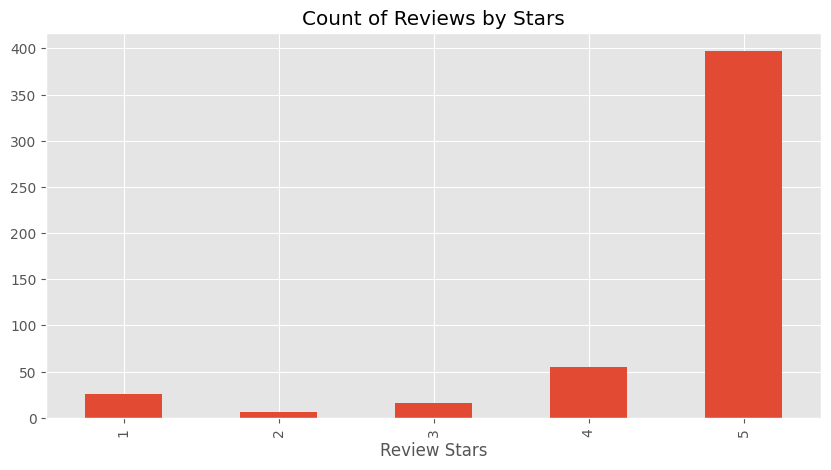

In [ ]:
ax = df['overall'].value_counts().sort_index() \
   .plot(kind= 'bar',
         title= 'Count of Reviews by Stars',
         figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

##Basic NLTK


In [ ]:
example = df['reviewText'][55]
print(example)

Really you can't say anything bad about it. Does what it says. Super fast and great storage size for lots of movies and such.


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Really', 'you', 'ca', "n't", 'say', 'anything', 'bad', 'about', 'it', '.']

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Really', 'RB'),
 ('you', 'PRP'),
 ('ca', 'MD'),
 ("n't", 'RB'),
 ('say', 'VB'),
 ('anything', 'NN'),
 ('bad', 'JJ'),
 ('about', 'IN'),
 ('it', 'PRP'),
 ('.', '.')]

In [ ]:
nltk.chunk.ne_chunk(tagged)

LookupError: 
**********************************************************************
  Resource [93mmaxent_ne_chunker_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('maxent_ne_chunker_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mchunkers/maxent_ne_chunker_tab/english_ace_multiclass/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import nltk
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

LookupError: 
**********************************************************************
  Resource [93mwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('words')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/words[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Really/RB
  you/PRP
  ca/MD
  n't/RB
  say/VB
  anything/NN
  bad/JJ
  about/IN
  it/PRP
  ./.
  Does/VBZ
  what/WP
  it/PRP
  says/VBZ
  ./.
  (PERSON Super/NNP)
  fast/NN
  and/CC
  great/JJ
  storage/NN
  size/NN
  for/IN
  lots/NNS
  of/IN
  movies/NNS
  and/CC
  such/JJ
  ./.)


##Vader Sentiment scoring

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.8968}

In [ ]:
# Run the priority score on the entire dataset

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['reviewText']
  if isinstance(text, str): # Check if the text is a string
    myId = row['Unnamed: 0'] # Using Unnamed: 0 as a temporary ID since 'Id' is not present
    result = sia.polarity_scores(text)
    res[myId] = result

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
res

{0: {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296},
 1: {'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'compound': -0.296},
 2: {'neg': 0.077, 'neu': 0.923, 'pos': 0.0, 'compound': -0.3089},
 3: {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.7081},
 4: {'neg': 0.038, 'neu': 0.835, 'pos': 0.127, 'compound': 0.7087},
 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6: {'neg': 0.063, 'neu': 0.745, 'pos': 0.192, 'compound': 0.8992},
 7: {'neg': 0.044, 'neu': 0.833, 'pos': 0.123, 'compound': 0.7768},
 8: {'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.296},
 9: {'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'compound': 0.9167},
 10: {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.9258},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 13: {'neg': 0.058, 'neu': 0.716, 'pos': 0.225, 'compound': 0.7425},
 14: {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.4295},
 15: {'neg': 0.057,

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left', left_on='Id', right_on='Unnamed: 0')

In [ ]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,0.688,0.312,0.000,-0.2960,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0.075,0.925,0.000,-0.2960,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,0.077,0.923,0.000,-0.3089,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,0.000,0.909,0.091,0.7081,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,0.038,0.835,0.127,0.7087,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


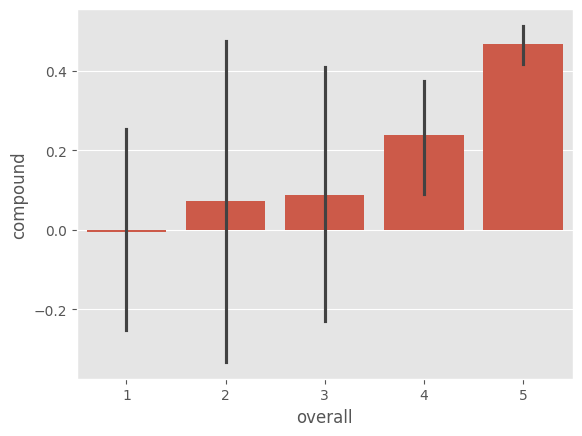

In [ ]:
sns.barplot(data=vaders, x='overall', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

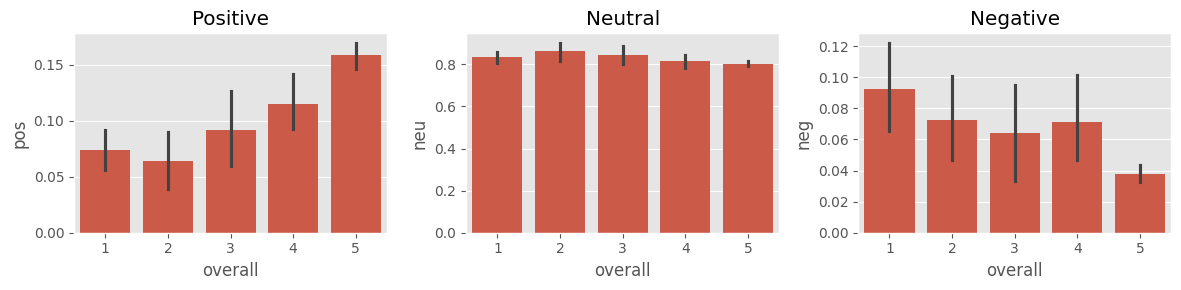

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data = vaders, x='overall', y='pos', ax=axs[0])
sns.barplot(data = vaders, x='overall', y='neu', ax=axs[1])
sns.barplot(data = vaders, x='overall', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

#Roberta Pretarained model

In [ ]:
 ##hugging face library
 from transformers import AutoTokenizer
 from transformers import AutoModelForSequenceClassification
 from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# Vader result on example
print(example)
sia.polarity_scores(example)

Really you can't say anything bad about it. Does what it says. Super fast and great storage size for lots of movies and such.


{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.8968}

In [ ]:
#run on Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.0118667595), 'roberta_neu': np.float32(0.11360533), 'roberta_pos': np.float32(0.8745279)}


In [ ]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt', truncation=True)
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
  }
  return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
 try:

  text = row['reviewText']
  myId = row['Unnamed: 0']
  vader_result = sia.polarity_scores(text)
  vader_result_rename = {}
  for key, value in vader_result.items():
    vader_result_rename[f'vader_{key}'] = value
  roberta_result = polarity_scores_roberta(text)
  both = {**vader_result_rename, **roberta_result}
  res[myId] = both

 except RuntimeError:
  print(f'Broke for id {myId}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 76
Broke for id 123


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left', left_on='Id', right_on='Unnamed: 0')

In [ ]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,0.688,0.312,0.000,-0.2960,0.074959,0.589215,0.335825,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0.075,0.925,0.000,-0.2960,0.007265,0.095529,0.897206,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,0.077,0.923,0.000,-0.3089,0.423756,0.448311,0.127933,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,0.000,0.909,0.091,0.7081,0.002447,0.019229,0.978324,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,0.038,0.835,0.127,0.7087,0.003552,0.067459,0.928989,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


Compare Scores between Models

In [ ]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Unnamed: 0',
       'reviewerName', 'overall', 'reviewText', 'reviewTime', 'day_diff',
       'helpful_yes', 'helpful_no', 'total_vote', 'score_pos_neg_diff',
       'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

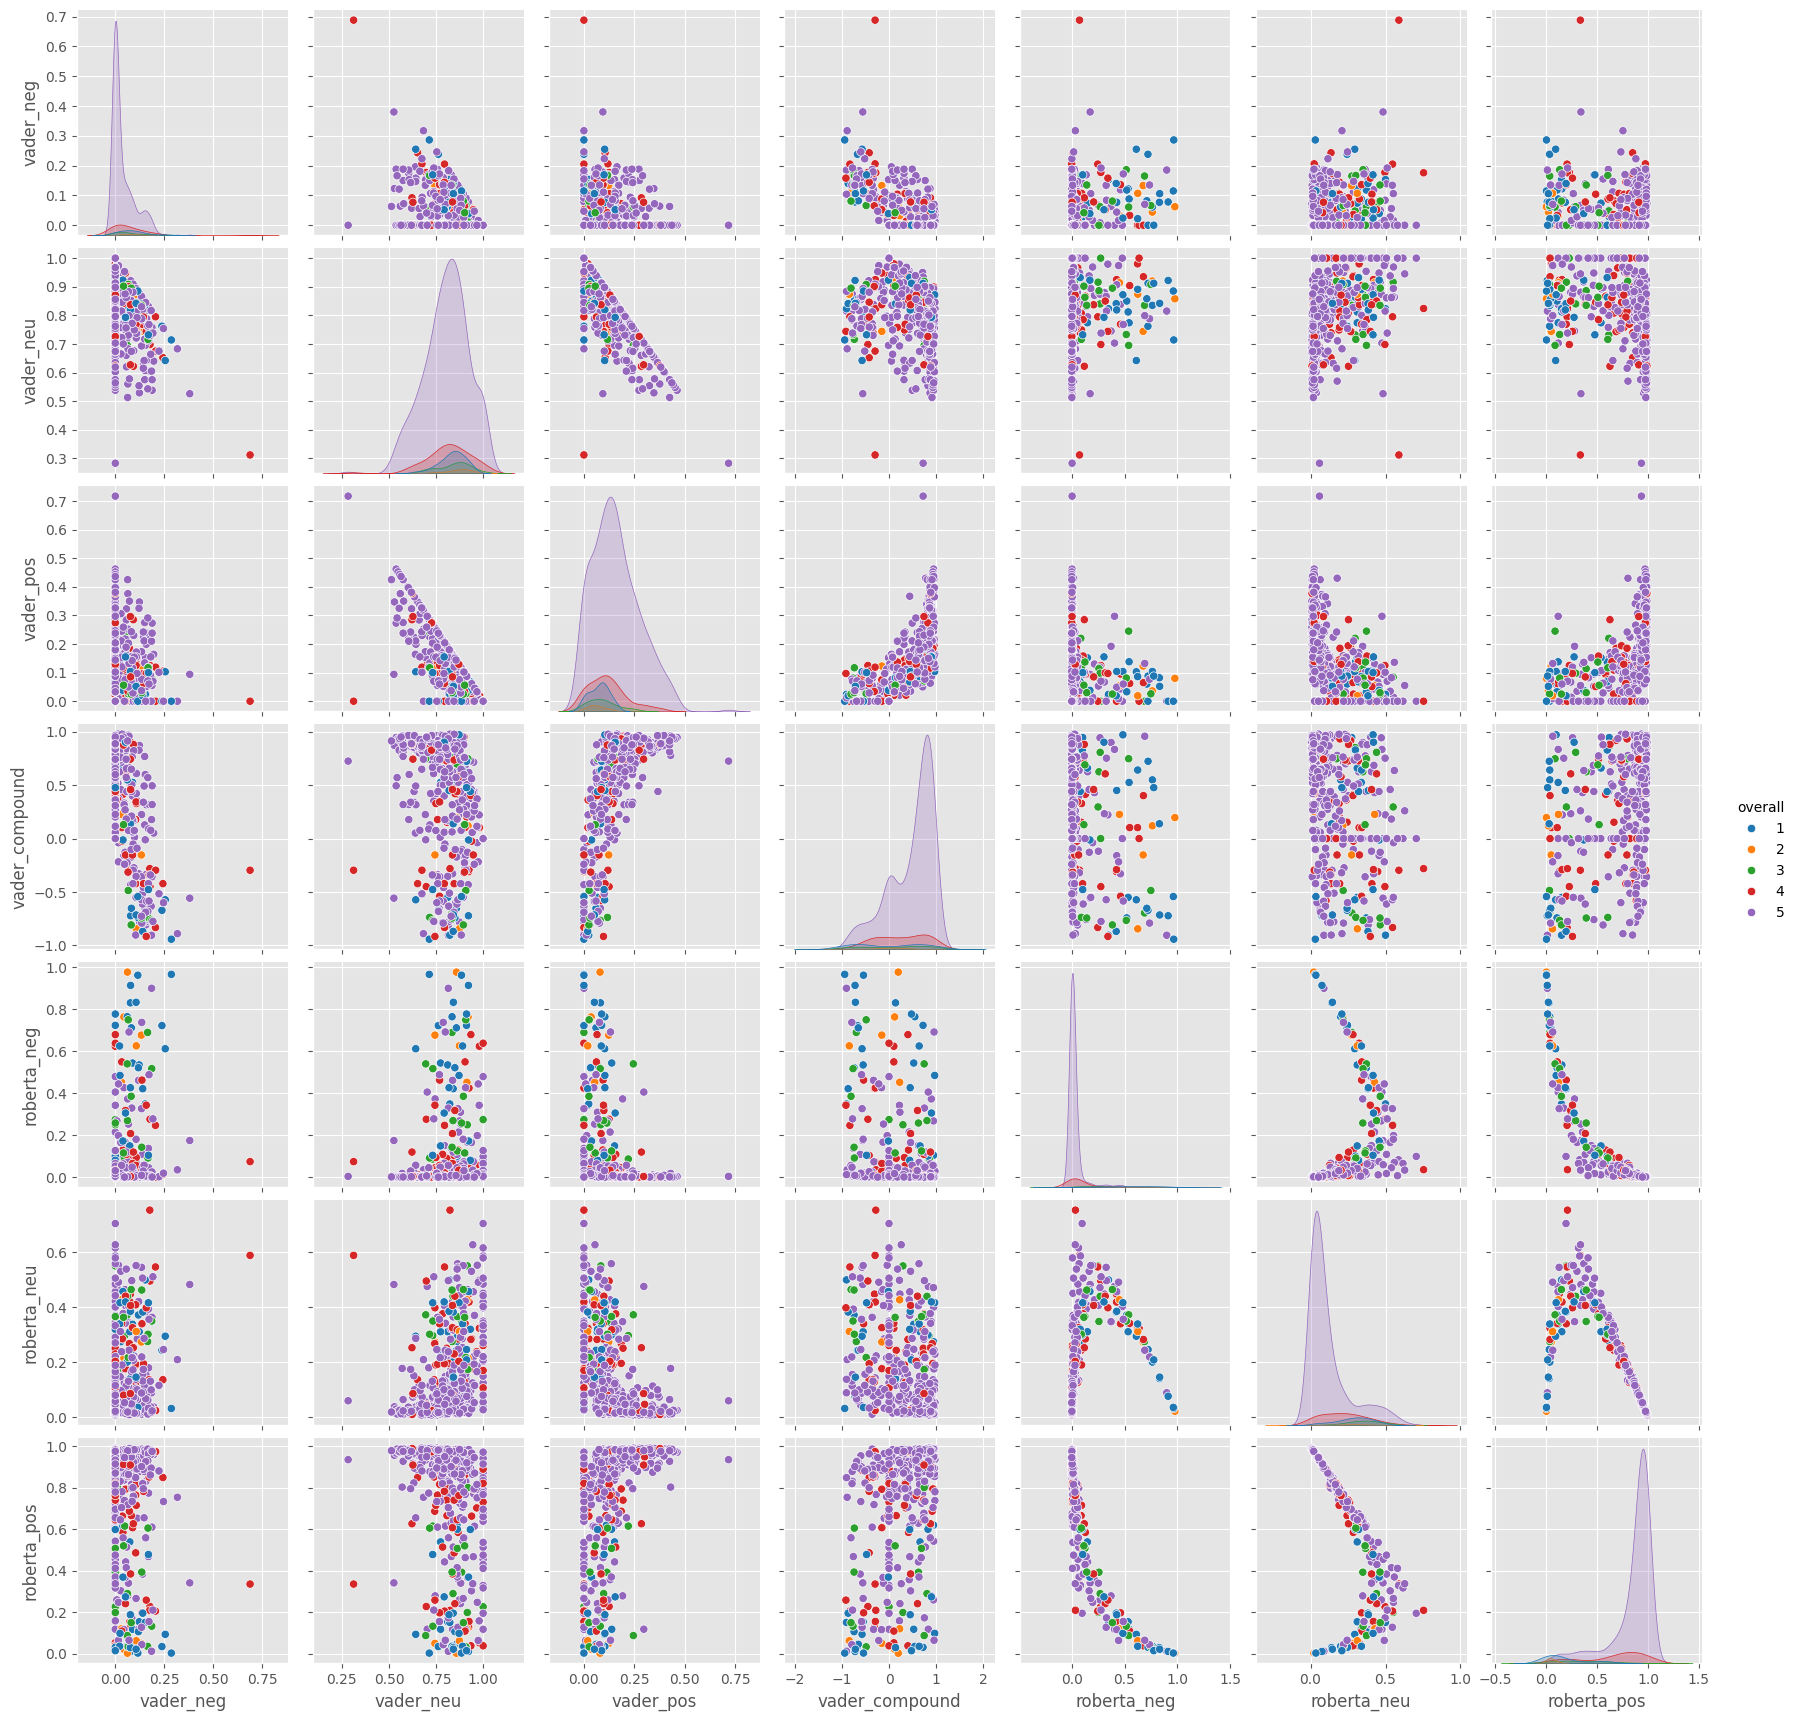

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue= 'overall',
             palette='tab10')
plt.show()

Review Examples

In [ ]:
results_df.query('overall == 1')\
.sort_values('roberta_pos', ascending=False)['reviewText'].values[0]

'I bougth this micro SD card after some trubles with other that i got from Kingston, i can tell that SanDisk is other quality, this is the best, my i9300 phone can read a 64GB very fast, the dta transfer speed from my pc to my is amazing, if you are looking for additional storage to you phone, for music, pictures and other type of files, this is for you.Pros-Very good quality materials of construction-Amazing speedUpdate after one year this memory is damaged I can not delete or put new files on it, I can not format this memory, I tried to format with my phone, with my pc, with a camera and nothing, now this is like a 64gb cd, the data in the memory is only available to read but I can not move, or delete it, I bought this memory to be used to backup all my data of my android device but now is only a readable memory I can not write data on it any more, I hope sandisk make a better products in the future!!! Total disagree I will buy a Samsung memory card expected a better quality.'

In [ ]:
results_df.query('overall == 1')\
.sort_values('vader_pos', ascending=False)['reviewText'].values[0]

"I really want to like these and I do trust SanDisk more than other manufacturers of memory cards. That said, I'm moving on to my 3rd card. Thank you Amazon for having exceptional customer service, or else I'd be very upset.Basically this card will suddenly not allow writing to it anymore. You can't save files to it, you can't delete files from it and you can't event format it. I've tried doing all three in different OS'es and devices with no luck. Doing some reading on the SanDisk forums this seems to be happening a lot with these cards.I'm returning this to Amazon and trying my luck with a different brand to see what happens."

In [ ]:
# negative sentiment 5 star view

In [ ]:
results_df.query('overall == 5')\
.sort_values('roberta_neg', ascending=False)['reviewText'].values[0]

'Appears to be Class 10, holds about as much as it says it does, came with an SD card adapter and they even gave me the option to forgo those ridiculous plastic packages that you all know and hate. The ones that the scissors refuse to cut and you just end up hurting yourself a few times before getting it open. Completely as advertised.'

In [ ]:
results_df.query('overall == 5')\
.sort_values('vader_neg', ascending=False)['reviewText'].values[0]

'This works with the NL1520.  No video stuttering like with the 64gb.  Blah blah blah blah to fill in the rest.'

The Transformers Pipeline

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
sent_pipeline('I am happy')

[{'label': 'POSITIVE', 'score': 0.9998801946640015}]

In [ ]:
sent_pipeline('boo')

[{'label': 'NEGATIVE', 'score': 0.9715901017189026}]

The End

##